In [2]:
# A module for handling data
import pandas as pd
# A module that helps finding all pathnames that match a certain pattern
import glob

# A class that will be used to count the number of times a word has occurred in a text
from sklearn.feature_extraction.text import CountVectorizer

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split



# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# The Python package for scientific computing
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import string
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics


# read data

In [3]:
# Read the tab-separated text file into a DataFrame
data = pd.read_excel('smsSpam.xlsx')


In [4]:
data

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


# change column name

In [5]:
data.columns=['CLASS','CONTENT']

# target classes distribution

In [6]:
data.CLASS.value_counts()

ham     4824
spam     747
Name: CLASS, dtype: int64

#  assign ham to 0 and spam to 1

In [7]:
data.CLASS = data.CLASS.apply(lambda x: 0 if x=="ham" else 1 if x=="spam" else -1)

# drop na

In [8]:
data.dropna(inplace=True)

# convert content to string format

In [9]:
data.CONTENT=data.CONTENT.apply(lambda x: str(x))

In [10]:
longest_string = ''
longest_length = 0
for text in data.CONTENT:
    if len(text) > longest_length:
        longest_string = text
        longest_length = len(text)

print("The longest string is '{}' with a length of {}.".format(longest_string, longest_length))

The longest string is 'For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..' with a length of 910.


# make to lowercase

In [11]:
data.CONTENT=[data.CONTENT.values[i].lower() for i in range(len(data.CONTENT.values))]


In [12]:
data

,CLASS,CONTENT
0,0,ok lar... joking wif u oni...
1,1,free entry in 2 a wkly comp to win fa cup fina...
2,0,u dun say so early hor... u c already then say...
3,0,"nah i don't think he goes to usf, he lives aro..."
4,1,freemsg hey there darling it's been 3 week's n...
...,...,...
5566,1,this is the 2nd time we have tried 2 contact u...
5567,0,will ü b going to esplanade fr home?
5568,0,"pity, * was in mood for that. so...any other s..."
5569,0,the guy did some bitching but i acted like i'd...


# tokenize

In [13]:
data.CONTENT=[word_tokenize(data.CONTENT.values[i]) for i in range(len(data.CONTENT.values))]

# remove stopwords and punctuations

In [14]:
final=[]
stopWords= stopwords.words("english")

for row in data.CONTENT.values:
    removal_stopWord= []
    for column in row:
        if (column not in stopWords) &(column not in string.punctuation):
            removal_stopWord.append(column)
    final.append(removal_stopWord)
        


In [15]:
final

[['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['u', 'dun', 'say', 'early', 'hor', '...', 'u', 'c', 'already', 'say', '...'],
 ['nah', "n't", 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  "'s",
  '3',
  'week',
  "'s",
  'word',
  'back',
  "'d",
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  '£1.50',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  "'melle",
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  '9',
  'copy',
  'friends',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'cu

In [16]:
# Lemmatizer
# import nltk
# lemmatizer = WordNetLemmatizer() 

# stemming

In [17]:
# Stemmer
#stemmer=PorterStemmer()

In [18]:
# Stemming every word
'''
stemmer_final=[]
for row in final:
    stemmer_store=[]
    for column in row:
        stem=stemmer.stem(column)
        stemmer_store.append(stem)
    stemmer_final.append(stemmer_store)
        
'''

'\nstemmer_final=[]\nfor row in final:\n    stemmer_store=[]\n    for column in row:\n        stem=stemmer.stem(column)\n        stemmer_store.append(stem)\n    stemmer_final.append(stemmer_store)\n        \n'

In [19]:
final[8]

['mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030']

In [20]:
without_lemma =final

In [21]:
stemmer=PorterStemmer()
[stemmer.stem(text) for text in without_lemma[8]]

['mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030']

# lemmatization

In [22]:

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}
def get_wordnet_pos(word,tag_dict):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()


    return tag_dict.get(tag, wordnet.NOUN)


# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# l every word
lemma_final=[]
for row in final:
    lemma_store=[]
    for column in row:
        lemma =lemmatizer.lemmatize(column, get_wordnet_pos(column,tag_dict))
        lemma_store.append(lemma)
    lemma_final.append(lemma_store)


In [23]:
lemma_final[8]

['mobile',
 '11',
 'month',
 'u',
 'r',
 'entitle',
 'update',
 'late',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030']

In [24]:
data.CONTENT=[" ".join(i) for  i in lemma_final]

In [25]:
data.CLASS.value_counts()[0]

4824

# distribution of data of each ham and spam

Text(0.5, 1.0, 'Distribution of data of each ham and spam')

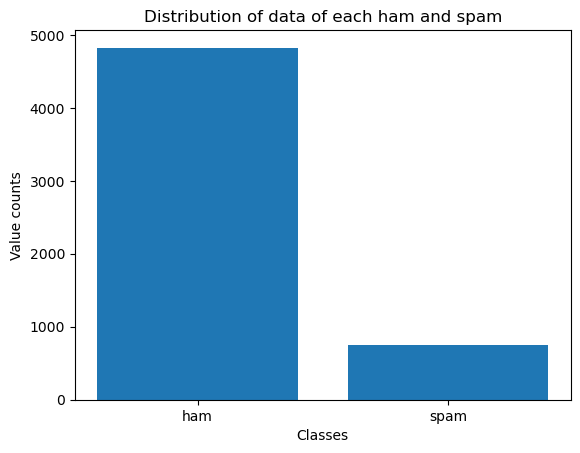

In [26]:
plt.bar(["ham","spam"],[data.CLASS.value_counts()[0],data.CLASS.value_counts()[1]])
plt.ylabel("Value counts")
plt.xlabel("Classes")
plt.title("Distribution of data of each ham and spam")

# train test split

In [27]:
X = data["CONTENT"]
y=data.CLASS

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify = y)

In [29]:
import numpy as np
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)

# oversampling to remove bias

In [30]:
oversampler = RandomOverSampler(sampling_strategy=0.8,random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [31]:
y_train.value_counts()

0    3859
1    3087
Name: CLASS, dtype: int64

In [32]:
X_train=X_train.flatten()

# countVectorizer

In [33]:
vectorizer = CountVectorizer()

In [34]:
x_train_transf = vectorizer.fit_transform(X_train).toarray()
x_test_transf = vectorizer.transform(X_test).toarray()


In [35]:
len(x_train_transf[0])

6805

# perform pca to remove redundant columns

In [36]:

 
pca = PCA(n_components =0.7)
 
x_train_transf = pca.fit_transform(x_train_transf)
x_test_transf = pca.transform(x_test_transf)
 


In [37]:
explained_variance = pca.explained_variance_ratio_

In [38]:
x_train_transf

array([[-0.48300198,  0.05693552, -0.51360229, ..., -0.09553393,
         0.18187142,  0.17665323],
       [-0.46778409, -0.16620288,  0.13509316, ...,  0.03786649,
         0.06160338,  0.07507849],
       [-0.56109611,  0.01490485,  0.31176724, ...,  0.09521776,
        -0.06759764, -0.04101621],
       ...,
       [ 0.09615435, -0.27920303,  0.09156587, ...,  0.20726617,
        -0.02744694, -0.09588631],
       [ 1.00154697, -0.00802907, -0.58139768, ..., -0.09397362,
         0.22606341,  0.06822188],
       [-0.4933935 ,  1.64691239, -1.32070873, ...,  0.3767558 ,
         0.13616807,  0.07737795]])

# train the xgboost model  and perform prediction

In [39]:
xgb = XGBClassifier()
xgb.fit(x_train_transf, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# evaluation for default model 

In [40]:
y_test.value_counts()

0    965
1    150
Name: CLASS, dtype: int64

In [41]:
y_pred = xgb.predict(x_test_transf)

# Using accuracy, precision, recall, and F1 score to evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [42]:
accuracy

0.9838565022421525

In [43]:
precision

0.9782608695652174

In [44]:
recall

0.9

In [45]:
f1

0.9375

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [47]:
confusion_matrix

array([[962,   3],
       [ 15, 135]], dtype=int64)

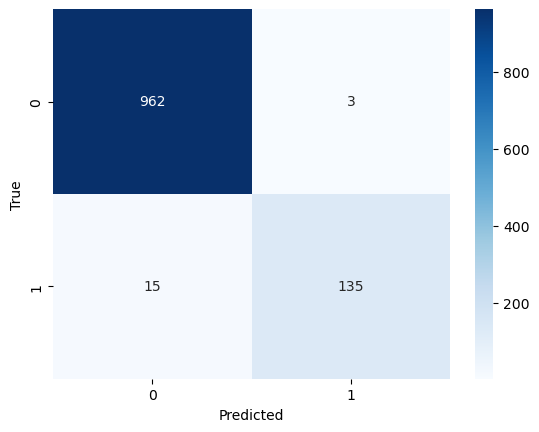

In [48]:
sns.heatmap(confusion_matrix, annot=True,  fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.90      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [50]:
from sklearn.metrics import plot_roc_curve

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


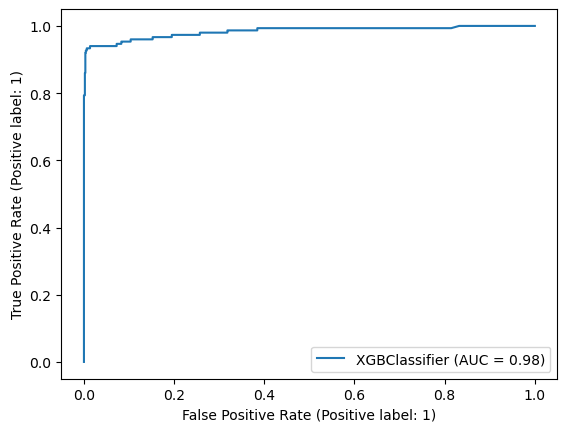

In [171]:
roc_display =plot_roc_curve(xgb, x_test_transf, y_test)

plt.show()

# hyperparameter tuning

In [183]:
param_grid = {
    'learning_rate': list(np.arange(0, 0.3, step=0.05)),
    'gamma': list(np.arange(1, 10, step=1)),
    'reg_lambda':list(np.arange(5, 10, step=1)),
    'max_depth':list(np.arange(1, 8, step=1))
    
    
}

# Create the random Search Cross-Validation object
grid = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=3, scoring="f1",n_iter=50)

# Fit the Grid Search Cross-Validation object to the training data
grid.fit(x_train_transf, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Parameters: ", grid.best_params_)
print("Best Accuracy Score: ", grid.best_score_)

Best Parameters:  {'reg_lambda': 6, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 1}
Best Accuracy Score:  0.9914747665510756


In [185]:
xgb1 = XGBClassifier(**grid.best_params_)
xgb1.fit(x_train_transf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [186]:
y_pred = xgb1.predict(x_test_transf)

# Evaluate the model performance using metrics such as accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [189]:
accuracy

0.9847533632286996

In [190]:
precision

0.9784172661870504

In [191]:
recall

0.9066666666666666

In [192]:
f1

0.9411764705882353

In [195]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[962,   3],
       [ 14, 136]], dtype=int64)

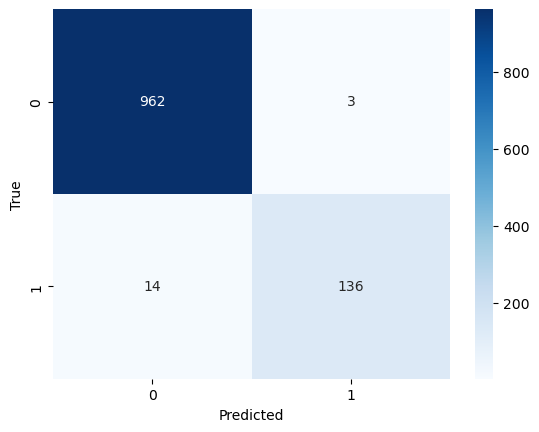

In [193]:
sns.heatmap(confusion_matrix, annot=True,  fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


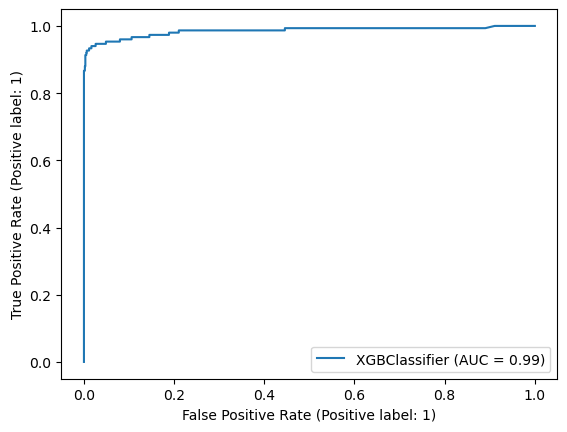

In [194]:
roc_display =plot_roc_curve(xgb1, x_test_transf, y_test)
plt.show()